# Analyzing, and Visualizing Data

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline  

In [2]:
matplotlib.style.use('ggplot')

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1987 non-null   int64  
 1   timestamp             1987 non-null   object 
 2   source                1987 non-null   object 
 3   text                  1987 non-null   object 
 4   expanded_urls         1987 non-null   object 
 5   rating_numerator      1987 non-null   float64
 6   rating_denominator    1987 non-null   float64
 7   name                  1987 non-null   object 
 8   favorites             1987 non-null   int64  
 9   retweets              1987 non-null   int64  
 10  user_followers        1987 non-null   int64  
 11  jpg_url               1987 non-null   object 
 12  dog_stage             1987 non-null   object 
 13  prediction_algorithm  1679 non-null   object 
 14  confidence_level      1987 non-null   float64
 15  dog_gender           

In [5]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,35865,7598,8822720,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,NaN
1,679877062409191424,2015-12-24 04:11:37+00:00,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,1954,637,8822124,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN,0.000000,NaN
2,680070545539371008,2015-12-24 17:00:27+00:00,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2543,844,8822123,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811,NaN
3,680085611152338944,2015-12-24 18:00:19+00:00,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,12601,8811,8822123,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000,NaN
4,680115823365742593,2015-12-24 20:00:22+00:00,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9.0,10.0,Ozzy,2671,882,8822123,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,None,pug,0.999365,male


In [6]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')
df['dog_gender'] = df['dog_gender'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2017-08-01 16:23:56+00:00 to 2016-06-03 01:07:16+00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tweet_id              1987 non-null   object  
 1   source                1987 non-null   category
 2   text                  1987 non-null   object  
 3   expanded_urls         1987 non-null   object  
 4   rating_numerator      1987 non-null   float64 
 5   rating_denominator    1987 non-null   float64 
 6   name                  1987 non-null   object  
 7   favorites             1987 non-null   int64   
 8   retweets              1987 non-null   int64   
 9   user_followers        1987 non-null   int64   
 10  jpg_url               1987 non-null   object  
 11  dog_stage             1987 non-null   category
 12  prediction_algorithm  1679 non-null   object  
 13  confidence_level      1987 non-null   float64 
 14  dog_gend

In [7]:
df.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,12.212270,10.511827,8194.850025,2424.984399,8.822117e+06,0.463913
std,41.536495,7.274245,12064.103942,4338.332969,5.930022e+01,0.339364
min,0.000000,7.000000,70.000000,11.000000,8.822079e+06,0.000000
25%,10.000000,10.000000,1761.000000,542.000000,8.822101e+06,0.140041
50%,11.000000,10.000000,3707.000000,1176.000000,8.822112e+06,0.457356
75%,12.000000,10.000000,10178.500000,2761.500000,8.822125e+06,0.776138
max,1776.000000,170.000000,154536.000000,76757.000000,8.822778e+06,0.999956


**Plot the correlation map to see the relationship between variables**


Text(0.5, 1, 'Correlation Map')

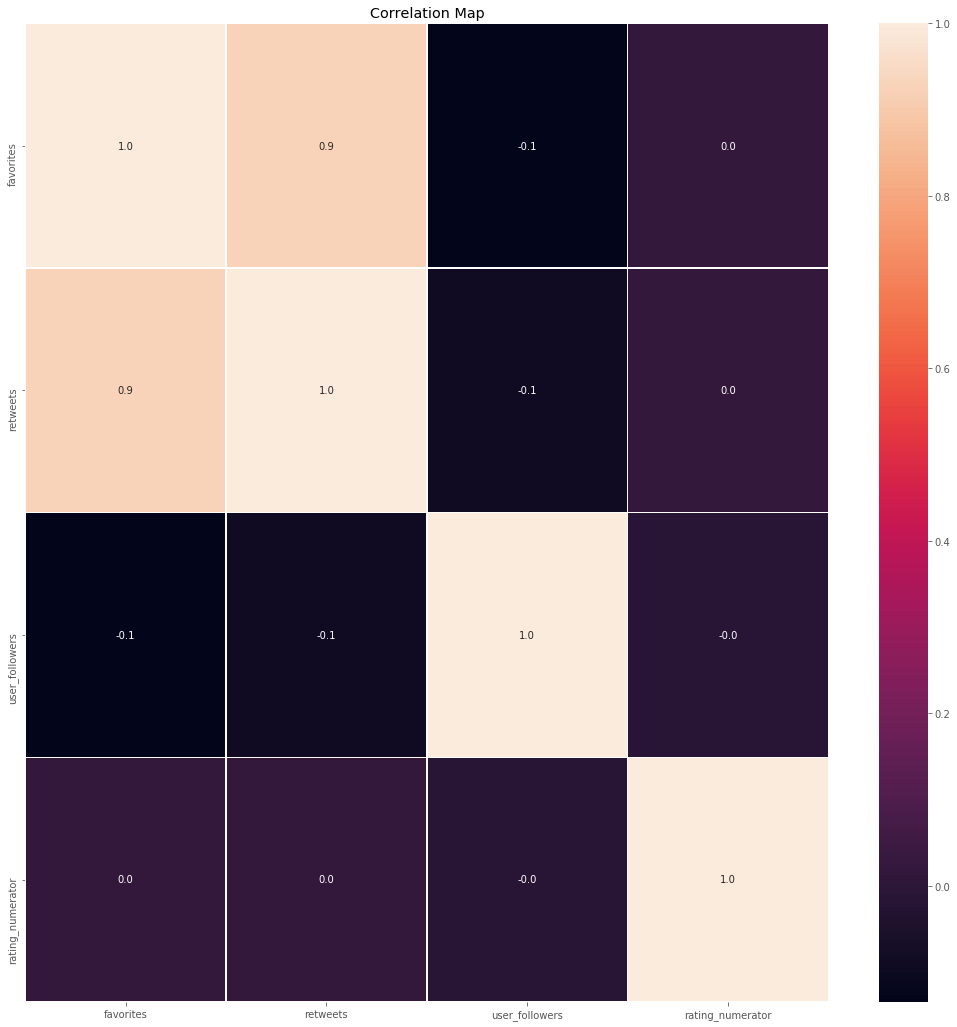

In [8]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between favorites and retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.4 (this seems the opposite of normal prediction)
- Rating don't get affected with any other variable from the ones we ploted

#### Tweet Retweet Vs Favorites.

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

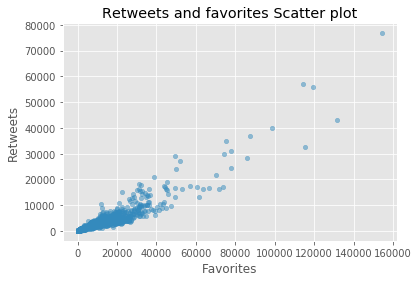

In [9]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As the correlation map shows that retweet is high correlated with favorites.

### Rating System

Text(0, 0.5, 'Rating')

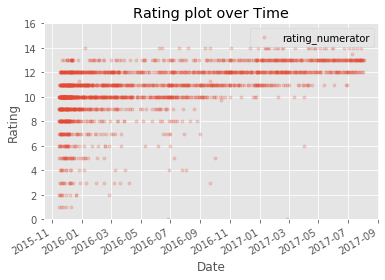

In [10]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')


- The page start with small rating than they adopt the system of rating numerator more than the denominator


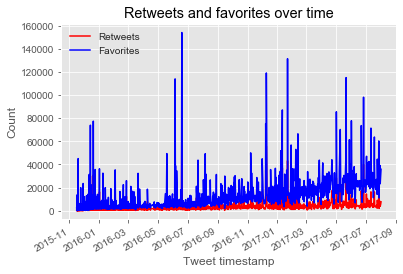

In [11]:
df['retweets'].plot(color = 'red', label='Retweets')
df['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

- Brent has all the right to get mad (ratings getting higher with no specific reason)


C:\Users\topp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\topp\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


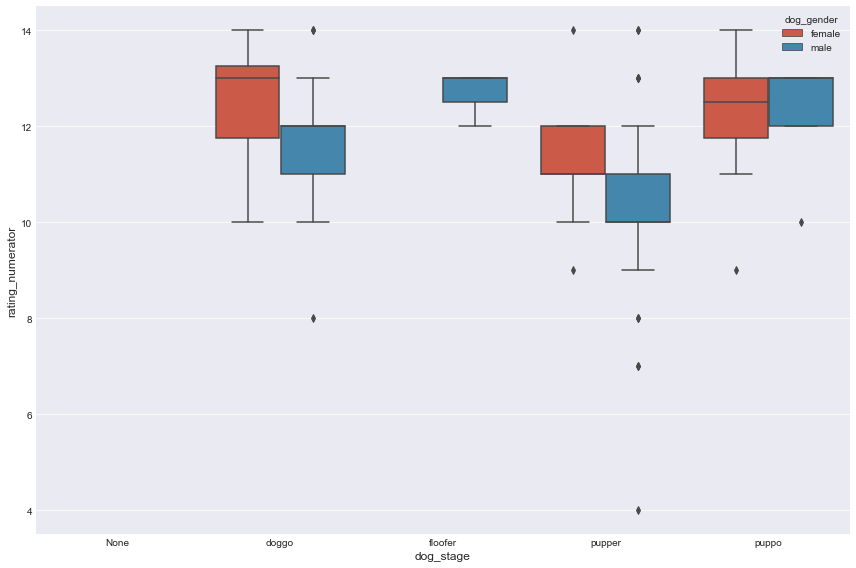

In [12]:
sns.factorplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage', 
               hue='dog_gender',  
               data=df[df['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.5,   
               legend_out=False) 

- According to our treatment (getting the gender from the text of the tweet) we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean

(-1.2880425899576236,
 1.2294910472489025,
 -1.242045058494045,
 1.2111704804959476)

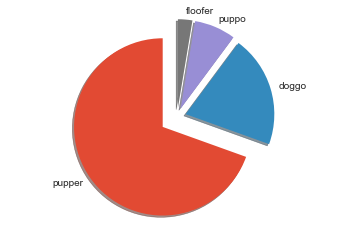

In [13]:
# Plot the data partitioned by dog stage
dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

In [14]:
df[df['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      11.870968
floofer    11.875000
pupper     10.638066
puppo      12.043478
Name: rating_numerator, dtype: float64

- Pupper is the most owned dog, but it has the lowest mean rating

### Conclusion

The Twitter account `WeRateDogs` (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum.

If you are thinking of adopting a dog, get a floof(er).